<h3>Incremento da Amostra de Dados com Simulação de Monte Carlo</h3>

<h4>Declaração de Variáveis</h4>

In [69]:
from Neuraline.Utilities.data import DataTable, DataExploration, ConvertData
from Neuraline.Utilities.chart import Chart
data_table, data_exploration, convert_data, chart = DataTable(), DataExploration(), ConvertData(), Chart()
url_path, url_save = './iris_original.json', './iris_atualizado.json'
list_inputs, list_outputs = ['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth'], ['species']

<h4>Exploração e Visualização dos Dados</h4>

In [70]:
result = data_table.visualization_json_inline(url_path, limit=10)
labels = data_exploration.getOutputTypesJSON(url_path=url_path, output_column='species')
indexes = [i for i, _ in enumerate(labels)]
print(f'species: {labels} - indexes {indexes}')

╒═══════════════╤══════════════╤═══════════════╤══════════════╤═══════════╕
│   sepalLength │   sepalWidth │   petalLength │   petalWidth │ species   │
╞═══════════════╪══════════════╪═══════════════╪══════════════╪═══════════╡
│           5.1 │          3.5 │           1.4 │          0.2 │ setosa    │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.9 │          3   │           1.4 │          0.2 │ setosa    │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.7 │          3.2 │           1.3 │          0.2 │ setosa    │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.6 │          3.1 │           1.5 │          0.2 │ setosa    │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           5   │          3.6 │           1.4 │          0.2 │ setosa    │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           

<h4>Substituição das Categorias de Texto para Número</h4>

In [71]:
str_csv = convert_data.readTEXT(url_path)
for i, label in enumerate(labels): str_csv = str_csv.replace(label, str(i))
convert_data.writeTEXT(text=str_csv, url_path=url_save)
result = data_table.visualization_json_inline(url_save, limit=10)

╒═══════════════╤══════════════╤═══════════════╤══════════════╤═══════════╕
│   sepalLength │   sepalWidth │   petalLength │   petalWidth │   species │
╞═══════════════╪══════════════╪═══════════════╪══════════════╪═══════════╡
│           5.1 │          3.5 │           1.4 │          0.2 │         2 │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.9 │          3   │           1.4 │          0.2 │         2 │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.7 │          3.2 │           1.3 │          0.2 │         2 │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           4.6 │          3.1 │           1.5 │          0.2 │         2 │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           5   │          3.6 │           1.4 │          0.2 │         2 │
├───────────────┼──────────────┼───────────────┼──────────────┼───────────┤
│           

<h4>Separação dos Dados entre Treinamento e Teste</h4>

In [74]:
inputs_train, outputs_train, inputs_test, outputs_test = data_exploration \
.dataSeparationJSON(url_path=url_save, list_inputs=list_inputs, list_outputs=list_outputs, training_percentage=.8, test_percentage=.2)
# conferindo o tamanho da amostra antes da simulação de monte carlo
print(f'inputs_train: {len(inputs_train)} - outputs_train: {len(outputs_train)}')

inputs_train: 120 - outputs_train: 120


<h4>Incrementando a Amostra de Treinamento com a Simulação de Monte Carlo</h4>

In [78]:
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.monte_carlo import MonteCarlo
monte_carlo = MonteCarlo()

monte_carlo.fit(inputs=inputs_train, outputs=outputs_train)
new_inputs, new_outputs = monte_carlo.simulation(predictions=120)
inputs_train, outputs_train = inputs_train+new_inputs, outputs_train+new_outputs
# conferindo o tamanho da amostra depois da simulação de monte carlo
print(f'inputs_train: {len(inputs_train)} - outputs_train: {len(outputs_train)}')

inputs_train: 240 - outputs_train: 240


<h4>Execução do Treinamento e Teste da Rede Neural</h4>

epoch...............................: 1 - loss: 0.80000000
epoch...............................: 2 - loss: 0.60000000
epoch...............................: 3 - loss: 0.40000000
epoch...............................: 4 - loss: 0.20000000
epoch...............................: 5 - loss: 0.00000000


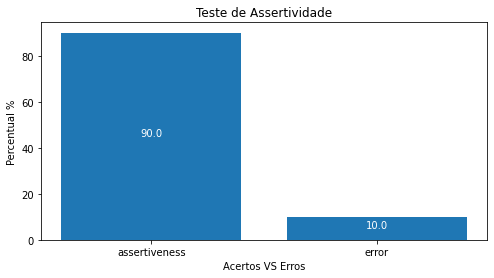

acertos: 0.9 - erros: 0.09999999999999998


In [81]:
from Neuraline.ArtificialIntelligence.DeepLearning.neural_network import NeuralNetwork
net = NeuralNetwork()
net.fit(inputs=inputs_train, outputs=outputs_train, epochs=5, show_error=True)
result_test = net.test(inputs=inputs_test, outputs=outputs_test)
x, y = list(result_test.keys()), [y*100 for y in list(result_test.values())]
chart.plotBAR(x=x, y=y, x_label='Acertos VS Erros', y_label='Percentual %', title='Teste de Assertividade', bar_values=True)
assertiveness, error = result_test['assertiveness'], result_test['error']
print(f'acertos: {assertiveness} - erros: {error}')

<h4>Salvamento do Modelo com o Melhor Resultado</h4>

In [80]:
net.saveModel('melhor_resultado')

True